# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Sampling method:
This is an observational study using the simple random sampling method to collect the current weather data from over 500 randomly selected cities with varying distances to the equator.

# Observations:

### World City Distribution
Majority of the cities are located in the northern hemisphere. This is probably because northern hemisphere has more land whereas southern hemisphere has more ocean.

### Weather Near the Equator

The tropics are the region surrounding the Equator (latitude = 0<sup>o</sup>), between the Tropic of Cancer (latitude = 23.4<sup>o</sup>) and Tropic of Capricorn (latitude = -23.4<sup>o</sup>). Temperature of cities in this region is generally warmer. As showing in Fig 1, most cities between latitude -20 to +20 have their max temperature greater than 60 <sup>o</sup>F. However, other main components of weather such as humidity, wind speed and cloudiness do not show a clear trend with latitude changes (Figures can be found in the "output_data" folder).

##### Fig 1. 
<img src="Output_data/Lat_vs_MaxTemp.png"> 

### Northern Hemisphere vs. Southern Hemisphere

#### Linear correlation <br>
There seem to be linear correlation between the max temperature and the latitude of both hemispheres. Of note, season is a factor that need to be taken into consideration as it is currently winter in the northern hemisphere and summer in the southern hemisphere (Dec 2020). Hence, the current correlation is a negative relationship between the max temperature and the latitude of the northern hemisphere (Fig 2, upper, R = -0.82), and a positive relationship between the max temperature and the latitude of the southern hemisphere (Fig 2, lower, R = 0.48). These relationship would be reversed when the time changes to the middle of the year. Another point to highlight is, the correlation between temperature and latitude is much stronger in the northern hemisphere and rather moderate in the southern hemisphere. This is probably due to the geographical differences between the two hemispheres. As southern hemisphere has significantly more ocean and less land, while water heats up and cools down more slowly than land, the temperatue changes would be less drastic to the latitude.

##### Fig 2.
<img src="Output_data/N_Lat_vs_MaxTemp.png"> 
<img src="Output_data/S_Lat_vs_MaxTemp.png"> 

#### Low correlaton (R between 0.3 and 0.5) / No correlation (R < 0.3)<br>
There seem to be low or no association of latitude with humidity, cloudiness or wind speed, regardless of which hemisphere. Their correlation coefficient (R) are shown below, figures can be found in the "output_data" folder. 

* Northern hemisphere<br>
 Humid vs. Latitude R = 0.31<br>
 Cloudiness vs. Latitude R= 0.39<br>
 Wind Speed vs. Latitude R = 0.16<br>
* Southern hemisphere<br>
 Humid vs. Latitude R = 0.39<br>
 Cloudiness vs. Latitude R = 0.27<br>
 Wind Speed vs. Latitude R = -0.35

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

657

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL and request results in Fahrenheit
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set empty lists to hold results
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
found_city = []

counter = 0
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through each city and make API request
for city in cities:
    # Make request and get weather data
    response = requests.get(query_url + city).json()
    # print(json.dumps(response, indent=4))
    # Incorporate a try-except to skip any missing data points.
    try:
        # Use list comprehension to update results
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_city.append(response['name'])
        counter = counter + 1
        print(f"Processing Record {counter} | {city}")
    except:
        print(f"City not found. Skipping...")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | iqaluit
Processing Record 2 | clyde river
Processing Record 3 | sao joao da barra
Processing Record 4 | anadyr
Processing Record 5 | upernavik
Processing Record 6 | kuching
Processing Record 7 | gari
Processing Record 8 | gandhidham
Processing Record 9 | saravena
Processing Record 10 | ribeira grande
Processing Record 11 | kodiak
Processing Record 12 | puerto ayora
Processing Record 13 | saskylakh
Processing Record 14 | guerrero negro
Processing Record 15 | chunskiy
City not found. Skipping...
Processing Record 16 | ola
Processing Record 17 | gidole
Processing Record 18 | rikitea
Processing Record 19 | kapaa
Processing Record 20 | bathsheba
Processing Record 21 | port blair
Processing Record 22 | georgetown
Processing Record 23 | victoria
Processing Record 24 | hermanus
Processing Record 25 | turukhansk
Processing Record 26 | ushuaia
Processing Record 27 | moose factory
Processing Record 28 | sechura
Process

Processing Record 232 | quzhou
City not found. Skipping...
Processing Record 233 | texarkana
Processing Record 234 | pimenta bueno
Processing Record 235 | datong
Processing Record 236 | leningradskiy
Processing Record 237 | tual
Processing Record 238 | narsaq
Processing Record 239 | naze
Processing Record 240 | rio brilhante
Processing Record 241 | lata
Processing Record 242 | new norfolk
Processing Record 243 | toamasina
Processing Record 244 | sayat
Processing Record 245 | russell
Processing Record 246 | chute-aux-outardes
Processing Record 247 | quatre cocos
Processing Record 248 | ust-nera
Processing Record 249 | ormara
Processing Record 250 | harper
Processing Record 251 | teknaf
Processing Record 252 | sambava
Processing Record 253 | marsabit
Processing Record 254 | vila velha
Processing Record 255 | emerald
City not found. Skipping...
Processing Record 256 | kieta
City not found. Skipping...
Processing Record 257 | labuan
Processing Record 258 | udachnyy
Processing Record 259 | 

Processing Record 467 | greenfield
Processing Record 468 | santana do acarau
Processing Record 469 | touros
Processing Record 470 | manzhouli
Processing Record 471 | sapulpa
Processing Record 472 | kodinar
Processing Record 473 | angoche
Processing Record 474 | halifax
Processing Record 475 | yanliang
Processing Record 476 | seymchan
Processing Record 477 | port hardy
Processing Record 478 | garden city
Processing Record 479 | paka
Processing Record 480 | zyryanka
Processing Record 481 | pervomayskoye
Processing Record 482 | aguimes
Processing Record 483 | santa marta
Processing Record 484 | gawler
Processing Record 485 | buraydah
Processing Record 486 | vihti
Processing Record 487 | kattivakkam
Processing Record 488 | bull savanna
Processing Record 489 | fare
Processing Record 490 | saint-georges
City not found. Skipping...
Processing Record 491 | novoagansk
Processing Record 492 | kurume
Processing Record 493 | kloulklubed
Processing Record 494 | zemio
Processing Record 495 | tessali

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Store results in a dictionary
weather_dict = {
    "City": found_city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
# Create a data frame from the dictionary
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.75,-68.51,10.40,66,40,17.22,CA,1607900752
1,Clyde River,70.47,-68.59,-2.20,70,90,6.93,CA,1607900759
2,São João da Barra,-21.64,-41.05,75.97,83,97,20.51,BR,1607900759
3,Anadyr,64.75,177.48,23.00,79,75,13.42,RU,1607900759
4,Upernavik,72.79,-56.15,24.51,98,100,1.54,GL,1607900752


In [6]:
# Summary of all columns with numeric data
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,6.130000e+02
mean,20.819315,19.715742,50.156427,75.371941,55.448613,8.253622,1.607901e+09
std,32.846080,89.830620,30.157675,18.951917,38.775574,6.237724,6.927658e+01
min,-54.800000,-175.200000,-48.910000,2.000000,0.000000,0.310000,1.607900e+09
25%,-7.510000,-61.750000,30.850000,68.000000,19.000000,3.420000,1.607901e+09
50%,24.140000,25.140000,59.790000,80.000000,70.000000,6.710000,1.607901e+09
75%,50.100000,99.630000,75.430000,90.000000,90.000000,11.180000,1.607901e+09
max,78.220000,179.320000,88.500000,100.000000,100.000000,45.100000,1.607901e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# check if any cities with humidity > 100%
weather_df_drop = weather_df.loc[weather_df['Humidity']>100,:]
weather_df_drop

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# export df to csv file
weather_df.index.name = 'City ID'
weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

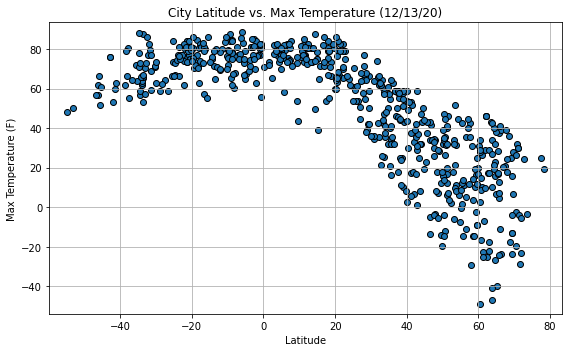

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker='o', edgecolors='black')
plt.title("City Latitude vs. Max Temperature (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(weather_df['Lat'])-5, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Max Temp'])-5, max(weather_df['Max Temp'])+5)
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

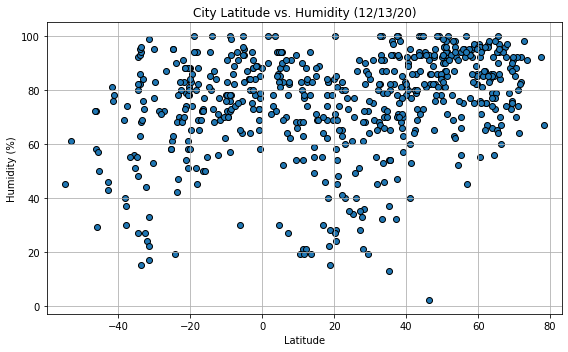

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o', edgecolors='black')
plt.title("City Latitude vs. Humidity (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(weather_df['Lat'])-5, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Humidity'])-5, max(weather_df['Humidity'])+5)
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_vs_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

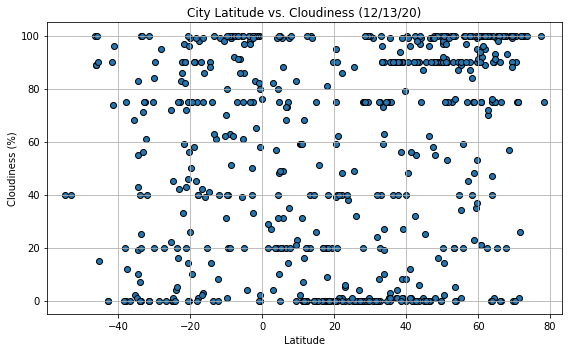

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o', edgecolors='black')
plt.title("City Latitude vs. Cloudiness (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(weather_df['Lat'])-5, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Cloudiness'])-5, max(weather_df['Cloudiness'])+5)
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_vs_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

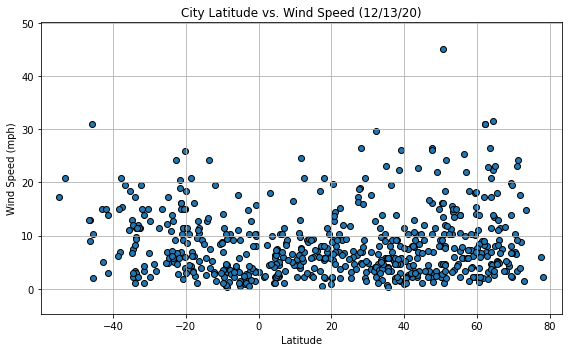

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o', edgecolors='black')
plt.title("City Latitude vs. Wind Speed (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(weather_df['Lat'])-5, max(weather_df['Lat'])+5)
plt.ylim(min(weather_df['Wind Speed'])-5, max(weather_df['Wind Speed'])+5)
plt.grid()
plt.tight_layout()
plt.savefig("output_data/Lat_vs_Wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Subset northern hemisphere df
N_hemisphere = weather_df.loc[weather_df['Lat']>0,:]
N_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Iqaluit,63.75,-68.51,10.40,66,40,17.22,CA,1607900752
1,Clyde River,70.47,-68.59,-2.20,70,90,6.93,CA,1607900759
3,Anadyr,64.75,177.48,23.00,79,75,13.42,RU,1607900759
4,Upernavik,72.79,-56.15,24.51,98,100,1.54,GL,1607900752
5,Kuching,1.55,110.33,73.40,100,20,2.24,MY,1607900759


The correlation between both factors is -0.82


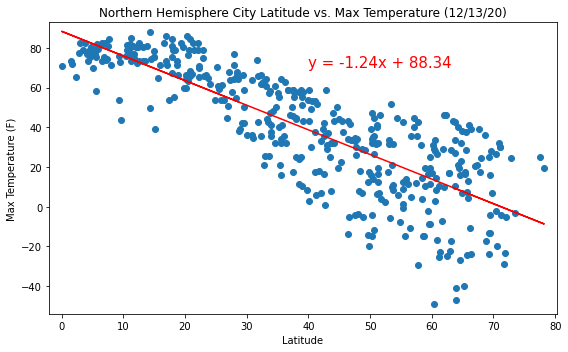

In [17]:
# fit the linear regression trendline and equation to the data
x_values = N_hemisphere['Lat']
y_values = N_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,70),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-2, max(N_hemisphere['Lat'])+2)
plt.ylim(min(N_hemisphere['Max Temp'])-5, max(N_hemisphere['Max Temp'])+5)
plt.tight_layout()
plt.savefig("output_data/N_Lat_vs_MaxTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Subset southern hemisphere df
S_hemisphere = weather_df.loc[weather_df['Lat']<0,:]
S_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
2,São João da Barra,-21.64,-41.05,75.97,83,97,20.51,BR,1607900759
11,Puerto Ayora,-0.74,-90.35,82.40,58,0,10.29,EC,1607900760
17,Rikitea,-23.12,-134.97,76.28,70,42,5.10,PF,1607900760
23,Hermanus,-34.42,19.23,57.00,92,19,7.49,ZA,1607900746
25,Ushuaia,-54.80,-68.30,48.20,45,40,17.22,AR,1607900520


The correlation between both factors is 0.48


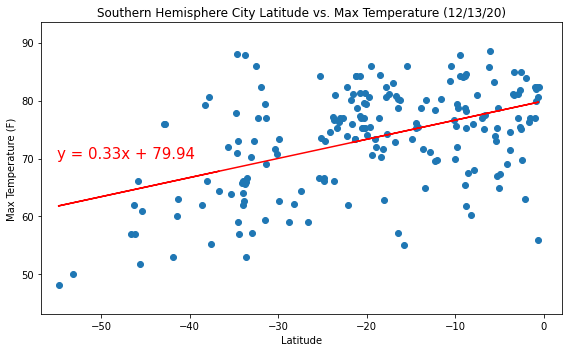

In [20]:
# fit the linear regression trendline and equation to the data
x_values = S_hemisphere['Lat']
y_values = S_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(S_hemisphere['Lat'])-2, 2)
plt.ylim(min(S_hemisphere['Max Temp'])-5, max(S_hemisphere['Max Temp'])+5)
plt.tight_layout()
plt.savefig("output_data/S_Lat_vs_MaxTemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31


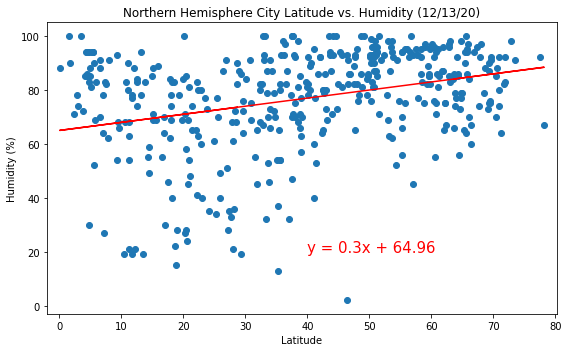

In [21]:
# fit the linear regression trendline and equation to the data
x_values = N_hemisphere['Lat']
y_values = N_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Humidity (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-2, max(N_hemisphere['Lat'])+2)
plt.ylim(min(N_hemisphere['Humidity'])-5, max(N_hemisphere['Humidity'])+5)
plt.tight_layout()
plt.savefig("output_data/N_Lat_vs_Humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.39


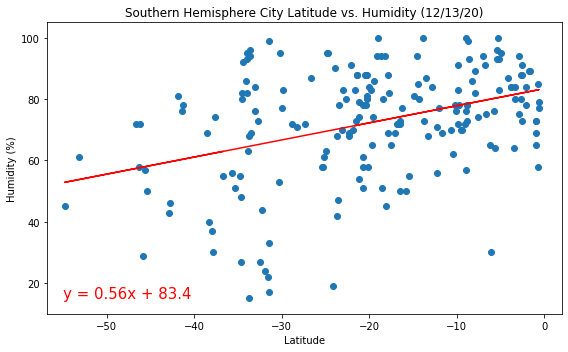

In [23]:
# fit the linear regression trendline and equation to the data
x_values = S_hemisphere['Lat']
y_values = S_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Humidity (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(S_hemisphere['Lat'])-2, 2)
plt.ylim(min(S_hemisphere['Humidity'])-5, max(S_hemisphere['Humidity'])+5)
plt.tight_layout()
plt.savefig("output_data/S_Lat_vs_Humid.png")
plt.show()

#####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.39


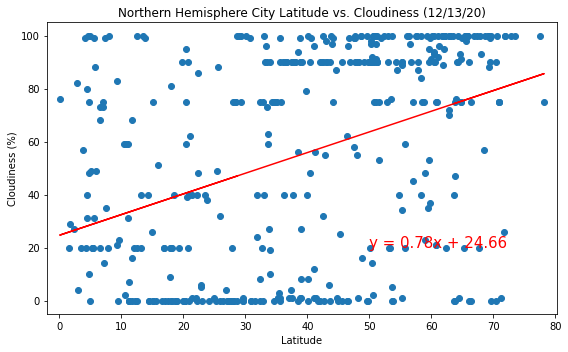

In [24]:
# fit the linear regression trendline and equation to the data
x_values = N_hemisphere['Lat']
y_values = N_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-2, max(N_hemisphere['Lat'])+2)
plt.ylim(min(N_hemisphere['Cloudiness'])-5, max(N_hemisphere['Cloudiness'])+5)
plt.tight_layout()
plt.savefig("output_data/N_Lat_vs_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.27


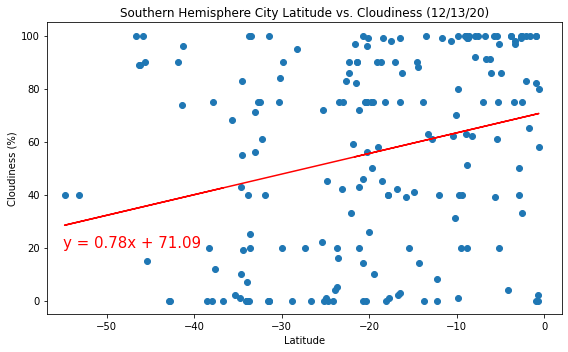

In [25]:
# fit the linear regression trendline and equation to the data
x_values = S_hemisphere['Lat']
y_values = S_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(min(S_hemisphere['Lat'])-2, 2)
plt.ylim(min(S_hemisphere['Cloudiness'])-5, max(S_hemisphere['Cloudiness'])+5)
plt.tight_layout()
plt.savefig("output_data/S_Lat_vs_Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.16


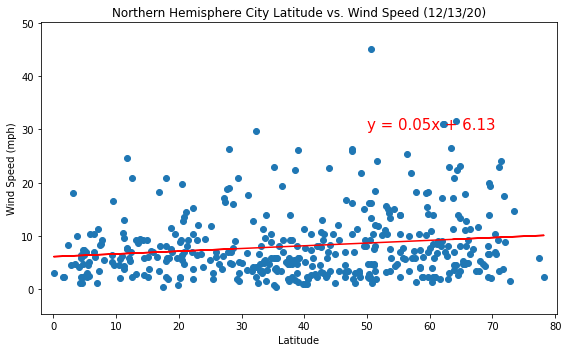

In [27]:
# fit the linear regression trendline and equation to the data
x_values = N_hemisphere['Lat']
y_values = N_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-2, max(N_hemisphere['Lat'])+2)
plt.ylim(min(N_hemisphere['Wind Speed'])-5, max(N_hemisphere['Wind Speed'])+5)
plt.tight_layout()
plt.savefig("output_data/N_Lat_vs_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.35


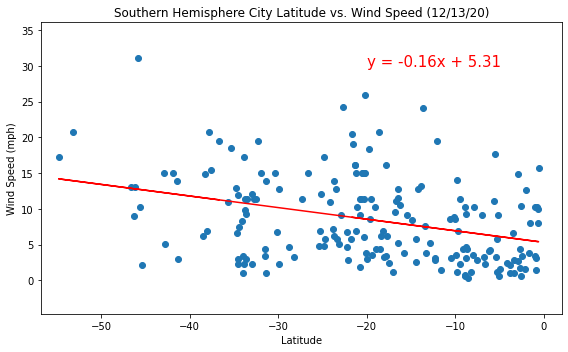

In [28]:
# fit the linear regression trendline and equation to the data
x_values = S_hemisphere['Lat']
y_values = S_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.figure(figsize=(8,5))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (12/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(S_hemisphere['Lat'])-2, 2)
plt.ylim(min(S_hemisphere['Wind Speed'])-5, max(S_hemisphere['Wind Speed'])+5)
plt.tight_layout()
plt.savefig("output_data/S_Lat_vs_Wind.png")
plt.show()